<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 8. Support Vector Machines: Introducción</span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

---
Las **Máquinas de Vectores de Soporte (SVM)** buscan un **hiperplano** que separe las clases con el **máximo margen** —la distancia a los puntos más cercanos (*vectores de soporte*). Cuando los datos no son perfectamente separables, se usa un **margen suave** regulado por un hiperparámetro **C**, que equilibra entre mayor generalización (margen amplio) y menos errores en entrenamiento.

**Intuición geométrica.** SVM busca el hiperplano $\mathbf{w}^\top \mathbf{x} + b = 0$ que maximiza el **margen**; los puntos que lo “tocan” son los **vectores de soporte**. Un margen amplio tiende a **generalizar** mejor.

### Margen duro (datos separables)
\begin{equation}
\min_{\mathbf{w},\, b}\ \frac{1}{2}\lVert \mathbf{w}\rVert^2 
\quad \text{s.a.} \quad
y_i\big(\mathbf{w}^\top \mathbf{x}_i + b\big) \ge 1,\ \forall i.
\end{equation}

### Margen suave (datos no separables)
Se permiten **holguras** $\psi_i \ge 0$ y se penalizan con $C>0$:
\begin{equation}
\min_{\mathbf{w},\, b,\, \boldsymbol{\psi}} \ \frac{1}{2}\lVert \mathbf{w}\rVert^2 + C\sum_{i=1}^{n}\psi_i
\quad \text{s.a.} \quad
y_i\big(\mathbf{w}^\top \mathbf{x}_i + b\big) \ge 1 - \psi_i,\ \psi_i \ge 0.
\end{equation}
$C$ controla el compromiso entre **margen amplio** (modelo más simple) y **menos errores** en entrenamiento.



En este notebook, con **datos ficticios**, visualizaremos cómo cambian las fronteras al variar estos hiperparámetros.

In [6]:
# Importación de librerías

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits import mplot3d
import seaborn as sns
import pandas as pd
from scipy import stats

# scikit-learn
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

style.use('ggplot')

## Algunos plots (incluidos en las notas)

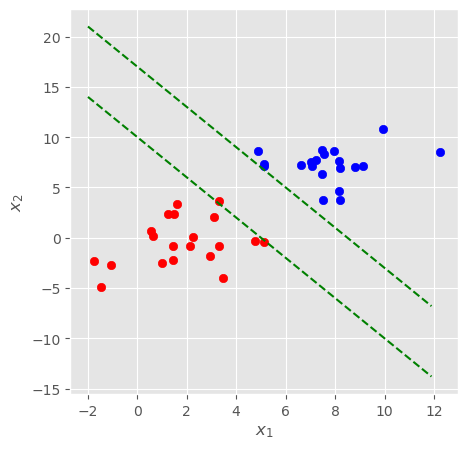

In [4]:
# Plots de las notas
# Creamos puntos aleatorios

# Semilla aleatoria
np.random.seed(4700)
a = np.random.multivariate_normal([8,8],[[3,1],[1,4]], size=[20,]) # normal en varias dimensiones

# generamos otras distribuciones
b = np.random.multivariate_normal([2,0],[[4,1],[1,5]], size=[20,])

x = np.arange(-2,12,0.1)

def line(a,b,x):
    res = a + b*x
    return res

# Plot
plt.figure(figsize=(5,5))
plt.scatter(a[:,0],a[:,1],c='blue')
plt.scatter(b[:,0],b[:,1],c='red')
plt.plot(x,line(10,-2,x),c='green',linestyle='--')
plt.plot(x,line(17,-2,x),c='green',linestyle='--')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
#plt.savefig('SVM_1.pdf', bbox_inches = 'tight')
plt.show()

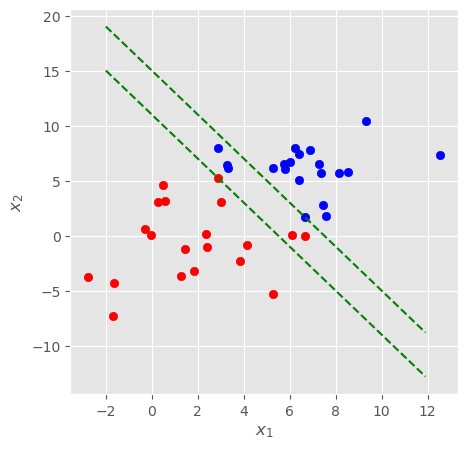

In [5]:
# Plots de las notas
# Creamos puntos aleatorios

# Semilla aleatoria
np.random.seed(4700)
a = np.random.multivariate_normal([7,7],[[5,1],[1,6]], size=[20,]) # normal en varias dimensiones

# generamos otras distribuciones
b = np.random.multivariate_normal([2,0],[[8,1],[1,10]], size=[20,])

x = np.arange(-2,12,0.1)

def line(a,b,x):
    res = a + b*x
    return res

# Plot
plt.figure(figsize=(5,5))
plt.scatter(a[:,0],a[:,1],c='blue')
plt.scatter(b[:,0],b[:,1],c='red')
plt.plot(x,line(11,-2,x),c='green',linestyle='--')
plt.plot(x,line(15,-2,x),c='green',linestyle='--')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
#plt.savefig('SVM_2.pdf', bbox_inches = 'tight')
plt.show()

## Implementación de Máquinas de soporte vectorial (lineal, clasificación) con `sklearn`

Implementaremos **SVM con scikit-learn** usando **datos ficticios**. Primero, podemos crear estos puntos aleatorios con `numpy`.

Dimensiones de los datos:  (40, 2)


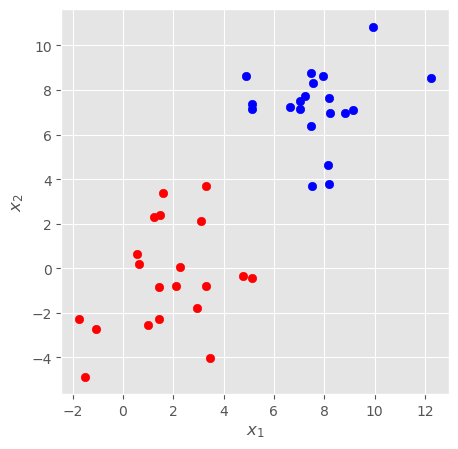

In [9]:
# Creamos puntos aleatorios

# Semilla aleatoria
np.random.seed(4700)

# Primera clase de datos
a = np.random.multivariate_normal([8,8],[[3,1],[1,4]], size=[20,]) # normal en varias dimensiones

# Segunda clase de datos
b = np.random.multivariate_normal([2,0],[[4,1],[1,5]], size=[20,])

x = np.arange(-2,12,0.1)

# Creamos el dataset
X = np.concatenate((a,b))
print('Dimensiones de los datos: ', X.shape)

# Plot
plt.figure(figsize=(5,5))
plt.scatter(a[:,0],a[:,1],c='blue')
plt.scatter(b[:,0],b[:,1],c='red')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

In [10]:
# Creamos un data frame y agregamos etiquetas a los puntos
data = pd.DataFrame(
{
    'V1':X[:,0],
    'V2':X[:,1]
})

data['y'] = np.where(data.index.values < 20, 0, 1)
data

,V1,V2,y
0,7.049267,7.162365,0
1,7.466827,6.373114,0
2,8.143002,4.642306,0
3,7.234039,7.733027,0
4,8.212472,6.980076,0
5,12.254943,8.527596,0
6,9.923428,10.846318,0
7,6.624014,7.218849,0
8,5.134523,7.154871,0
9,7.544801,8.295893,0


In [11]:
# Variables predictoras y variable objetivo
predictors = ['V1','V2']
target = 'y'

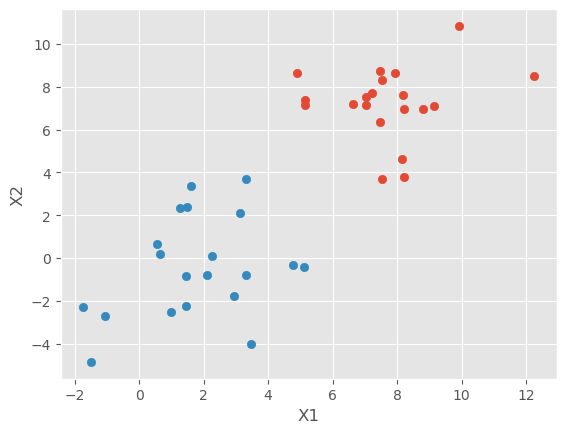

In [22]:
plt.scatter(data['V1'][:20],data['V2'][:20])
plt.scatter(data['V1'][20:],data['V2'][20:])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Implementación con `sklearn`

In [13]:
# implementacion con scikit-learn
# 1. Instanciamos el modelo 
classifier = SVC(kernel = 'linear',
                 C=1.0)
# 2. Entrenamos con los datos
classifier.fit(data[predictors], data[target])

SVC(kernel='linear')

In [14]:
# Ejemplo: con el modelo entrenado, clasificamos un dato
p = np.array([0.57,0.67]).reshape(1,2) # vector de ejemplo
classifier.predict(p) # predicción de la clasificación con el modelo

/Users/vanotole/anaconda3/envs/tsi_ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [15]:
# otro vector de ejemplo
p = np.array([10,10]).reshape(1,2)
classifier.predict(p)

/Users/vanotole/anaconda3/envs/tsi_ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

## Representación gráfica

En **SVM lineal**, `coef_` devuelve el/los vector(es) de pesos **$\mathbf{w}$** que definen la orientación del hiperplano de separación (importancia y signo por característica), mientras que `intercept_` devuelve el **término independiente** **$b$**. La **función de decisión** es $f(\mathbf{x})=\mathbf{w}^\top\mathbf{x}+b$; su signo determina la clase.


In [16]:
## Devolvemos los pesos w del clasificador
w = classifier.coef_[0]
w

array([-0.47211126, -0.32732305])

In [18]:
a = - w[0] / w[1] # Con el vector podemos calcular la pendiente
a

np.float64(-1.4423403972374553)

In [19]:
#ordenada en el origen
b = - classifier.intercept_[0]/w[1]
b

np.float64(11.504728644767502)

El hiperplano sería

\begin{equation}
y = a \cdot x+ b
\end{equation}

El modelo sería w0 x + w1 + e = 0

In [20]:
xx = np.arange(-2,12,1)
yy = a*xx+b

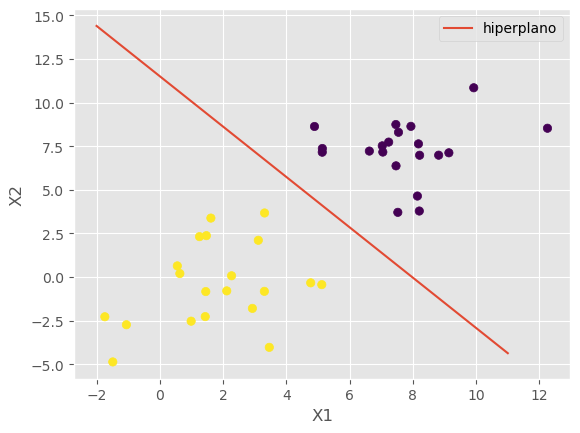

In [23]:
plt.plot(xx,yy, label='hiperplano')
plt.scatter(data['V1'],data['V2'],c=data[target])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

### Separación entre clases, ejemplos de hiperplano separador

In [24]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

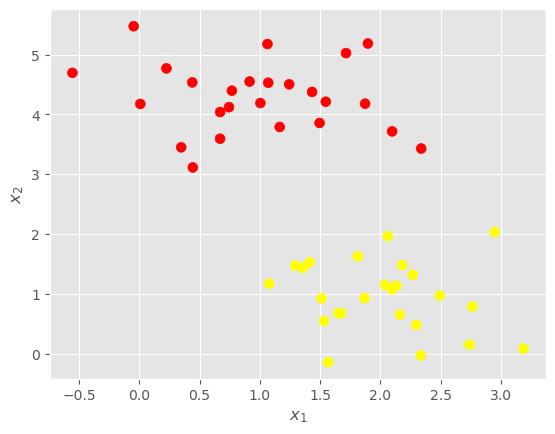

In [29]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

(-1.0, 3.5)

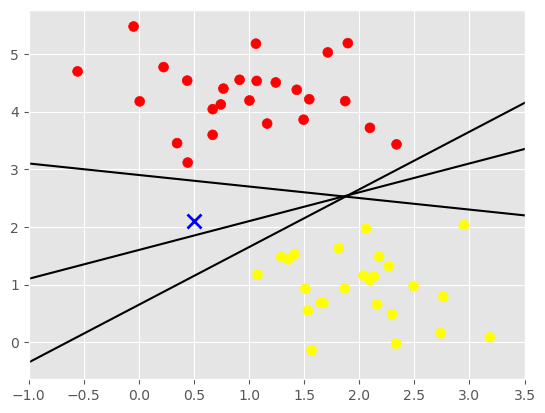

In [30]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

### Maximización del margen

(-1.0, 3.5)

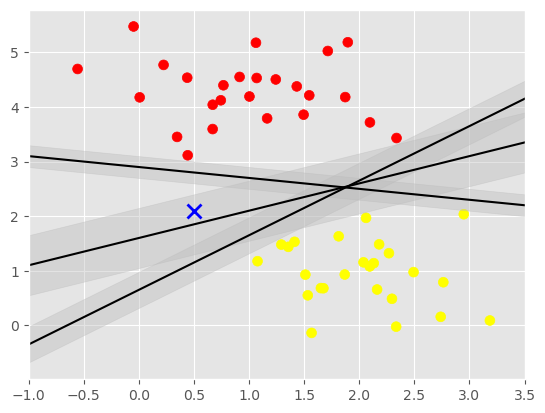

In [31]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha = 0.4)
    
plt.xlim(-1,3.5)

## SVM

En esta sección variaremos el hiperparámetro **C** del SVM (margen suave). **C** controla la penalización por errores: con **C pequeño** el modelo acepta más errores para **ampliar el margen** (mejor generalización), mientras que con **C grande** busca **minimizar errores en entrenamiento**, estrechando el margen y pudiendo **sobreajustar**. Mantendremos fijo el kernel y compararemos la **frontera de decisión**, y los **vectores de soporte**.

**Nota en scikit-learn:** el hiperparámetro **C** en `SVC` es el **inverso** de la fuerza de regularización. Un **C grande** ⇒ **menos regularización** (margen más estrecho, menos tolerancia a errores); un **C pequeño** ⇒ **más regularización** (margen más amplio, más tolerancia).



In [46]:
model=SVC(kernel="linear", C = 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [47]:
# Función para hacer gráficos que incluyan los vectores de soporte

def plt_svc(model, ax=None, plot_support=True):
    # Grafico de funcion de decision (SVC, 2D)
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Rango de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


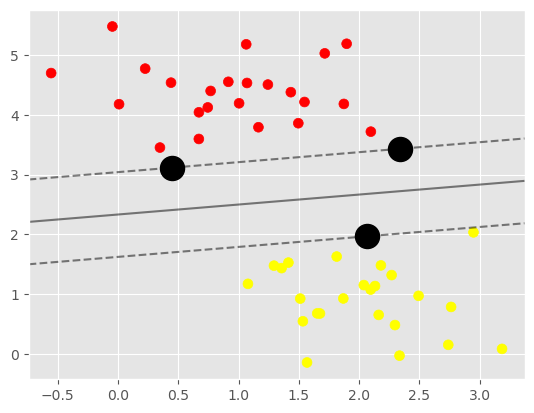

In [48]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)
plt.show()

In [49]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


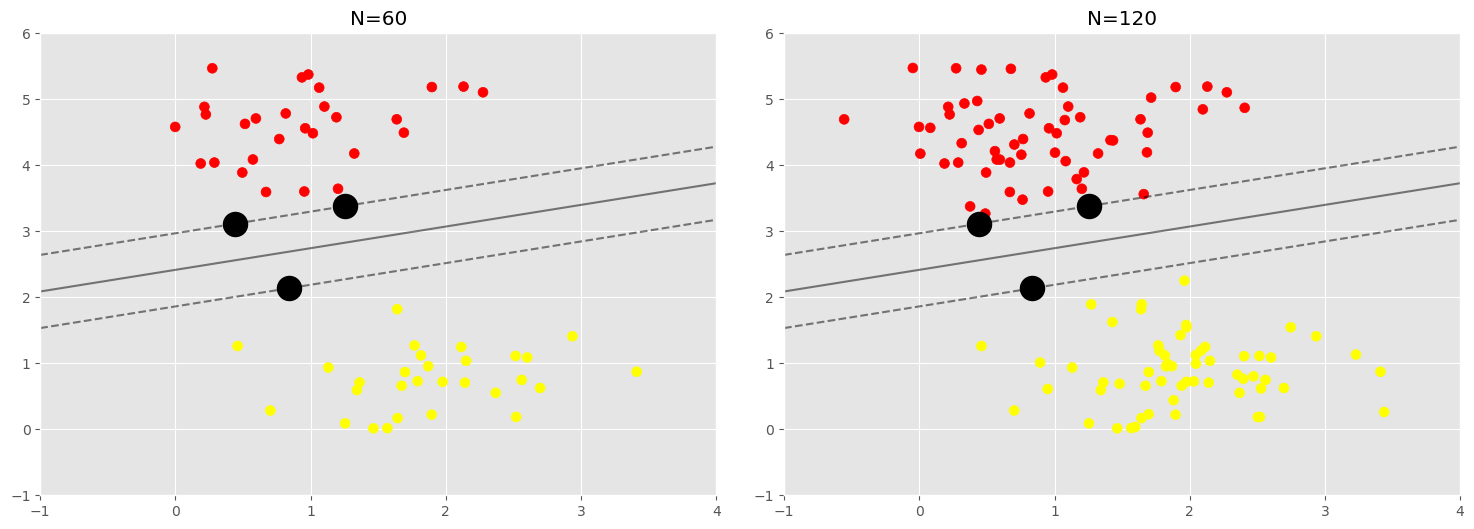

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [51]:
from ipywidgets import interact, fixed

In [52]:
interact(plot_svm, N=[10,20,50,60,100,120,200], ax=fixed(None))
plt.show()

interactive(children=(Dropdown(description='N', options=(10, 20, 50, 60, 100, 120, 200), value=10), Output()),…

## Kernel no lineales

Cuando las clases no son separables de forma lineal en el espacio original, SVM puede separar en un espacio de mayor dimensión mediante un mapeo implícito $\phi(\mathbf{x})$ sin calcularlo explícitamente: basta con definir un **kernel** $K(\mathbf{x},\mathbf{z})=\langle \phi(\mathbf{x}),\phi(\mathbf{z})\rangle$. Así, la función de decisión usa solo kernels: $f(\mathbf{x})=\operatorname{sign}\!\left(\sum_i \alpha_i y_i\,K(\mathbf{x}_i,\mathbf{x})+b\right)$. 

Kernels comunes:
* **polinómico** $K(\mathbf{x},\mathbf{z})=(\gamma\,\mathbf{x}^\top\mathbf{z}+c)^d$ (controla grado/curvatura)
* **RBF** $K(\mathbf{x},\mathbf{z})=\exp(-\gamma\lVert\mathbf{x}-\mathbf{z}\rVert^2)$ (fronteras locales; $\gamma$ mayor ⇒ más curvatura)
* **sigmoide**. $K(\mathbf{x},\mathbf{z}) \;=\; \tanh\!\big(\gamma\,\mathbf{x}^{\top}\mathbf{z} + c\big)$

**Ventajas**: capturan fronteras curvas con pocos hiperparámetros; cuidado con **sobreajuste** si $\gamma$ es grande o **C** es muy alto. Requiere **estandarizar** y seleccionar **C** y parámetros del kernel vía **validación cruzada**. *(Nota: con kernels no lineales no hay `coef_`; se interpretan `support_vectors_` y `dual_coef_`.)*


In [54]:
# puntos aleatorios
X, Y = make_circles(100, factor = .1, noise = .1) 

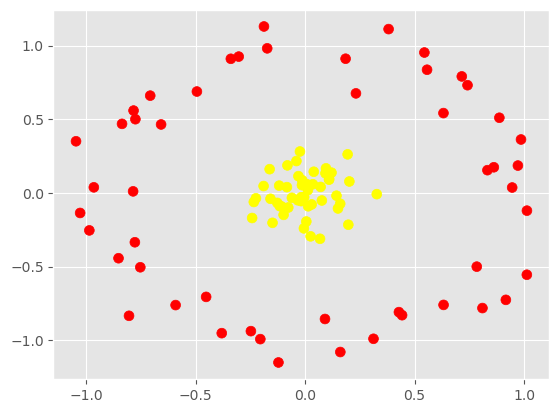

In [55]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.show()

[[ 0.31215641 -0.99027627]
 [ 0.44276814 -0.83002114]
 [ 0.54469354  0.95338355]
 [ 0.09052093 -0.85579333]
 [-0.38122562 -0.95203109]
 [-0.12219339 -1.15110829]
 [-0.1735694   0.98182427]
 [ 0.55689143  0.83659108]
 [-0.24808484 -0.93836752]
 [-0.9657192   0.03811325]
 [-0.45261804 -0.70573413]
 [ 0.74179215  0.7315757 ]
 [-0.33967776  0.91084348]
 [ 0.23192773  0.67601583]
 [-0.20498556 -0.99253745]
 [-0.65841455  0.46504169]
 [ 1.01287316 -0.55538659]
 [ 0.38119533  1.11244064]
 [ 0.83273877  0.15462341]
 [ 0.86203172  0.17436294]
 [ 0.71563969  0.79121772]
 [ 0.63234418 -0.76019099]
 [ 0.16055324 -1.08008704]
 [-0.78627366  0.01075102]
 [ 0.88726374  0.51054459]
 [-0.49481488  0.68852556]
 [-0.18837309  1.13024694]
 [ 0.18470039  0.91131038]
 [-0.7081226   0.66062442]
 [ 1.01325973 -0.12025146]
 [-0.75339418 -0.50462762]
 [-0.77587474  0.50070524]
 [-1.02836454 -0.13592437]
 [-0.83691893  0.46909058]
 [-0.98631562 -0.25423381]
 [ 0.9862011   0.36291415]
 [ 0.94584307  0.03680472]
 

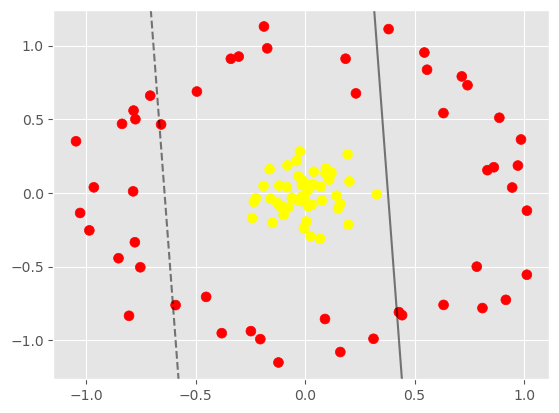

In [69]:
# Implementamos kernel 
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [70]:
r = np.exp(-(X**2).sum(1) / 1000)

In [71]:
r

array([0.99997999, 0.99995319, 0.99996644, 0.99997327, 0.99892249,
       0.99911541, 0.99998601, 0.9987951 , 0.9992597 , 0.99894886,
       0.99866092, 0.99999656, 0.99989369, 0.99900639, 0.99997848,
       0.99996812, 0.9989905 , 0.99905836, 0.99906637, 0.99999162,
       0.99994206, 0.99929732, 0.99999881, 0.99994758, 0.99891513,
       0.99996306, 0.99905543, 0.99993656, 0.99948934, 0.99991461,
       0.99997355, 0.99989851, 0.99897338, 0.99935044, 0.99866652,
       0.99861812, 0.99928289, 0.9992268 , 0.99886248, 0.999948  ,
       0.99902273, 0.99996904, 0.99880835, 0.9999515 , 0.99938185,
       0.99996168, 0.99895266, 0.99928135, 0.99999521, 0.99998422,
       0.99999336, 0.99991255, 0.99995833, 0.99991228, 0.99868792,
       0.99999158, 0.99913577, 0.9999953 , 0.99906258, 0.99895939,
       0.99997772, 0.99917809, 0.99994111, 0.99996654, 0.99914768,
       0.99892457, 0.99989295, 0.9999792 , 0.99907994, 0.99896308,
       0.99999918, 0.99889631, 0.99910443, 0.99907262, 0.99999

In [72]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

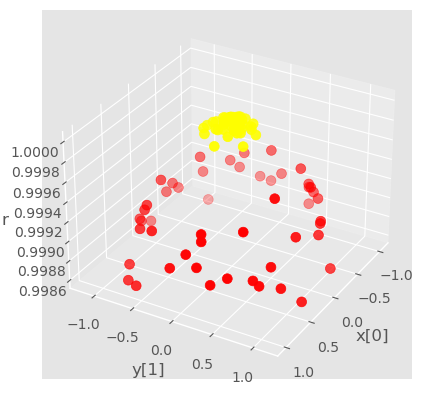

In [74]:
plot_3D()
#interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
#         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
#         X = fixed(X), Y = fixed(Y), r = fixed(r))
plt.show()

In [75]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

[[ 0.09052093 -0.85579333]
 [-0.45261804 -0.70573413]
 [ 0.23192773  0.67601583]
 [-0.65841455  0.46504169]
 [ 0.83273877  0.15462341]
 [-0.78627366  0.01075102]
 [ 0.42826505 -0.80927673]
 [ 0.78407013 -0.50045839]
 [ 0.19396885  0.26208581]
 [ 0.06778565 -0.31128938]
 [-0.2424143  -0.17016134]]


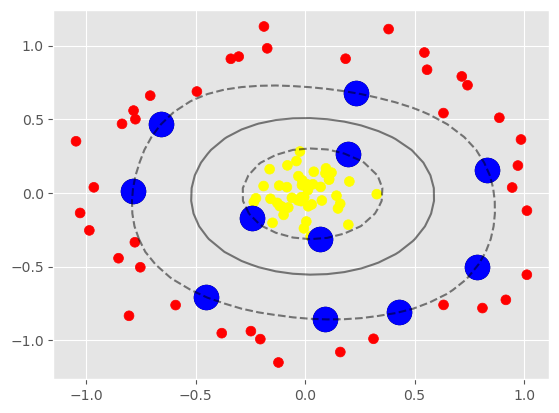

In [77]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")
plt.show()

## Resumen 

En este notebook se introdujo el modelo de **Máquinas de Vectores de Soporte (SVM)** desde una perspectiva geométrica e intuitiva. Comenzamos con datos ficticios para ilustrar problemas linealmente separables y no lineales. 

Se exploró el concepto de **margen máximo**, así como el papel del hiperparámetro **C** en la flexibilidad del margen: valores bajos permiten mayor margen con más errores, mientras que valores altos restringen el margen y ajustan más a los datos de entrenamiento. Usamos un **SVM lineal** (`kernel="linear"`) para interpretar los coeficientes y la orientación del hiperplano, y se explicó cómo obtener y transformar `coef_` e `intercept_`.

Posteriormente, se introdujo el **truco del kernel**, que permite extender el modelo a casos no lineales, utilizando el **kernel RBF** como ejemplo.

---

## Conclusiones

- **SVM es un modelo poderoso y versátil**, especialmente útil en espacios de alta dimensión y en problemas donde se desea una frontera clara entre clases.
- El hiperparámetro **C** controla el equilibrio entre **complejidad del modelo** y **tolerancia al error**: C pequeño → margen amplio y mejor generalización; C grande → menor margen y riesgo de sobreajuste.
- El **truco del kernel** permite manejar fronteras no lineales sin transformar explícitamente los datos; basta con definir un kernel adecuado.
- En problemas reales, es crucial usar **pipelines con estandarización**, y seleccionar hiperparámetros con **validación cruzada** para evitar sobreajuste.
